## Subplots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Basic Subplots

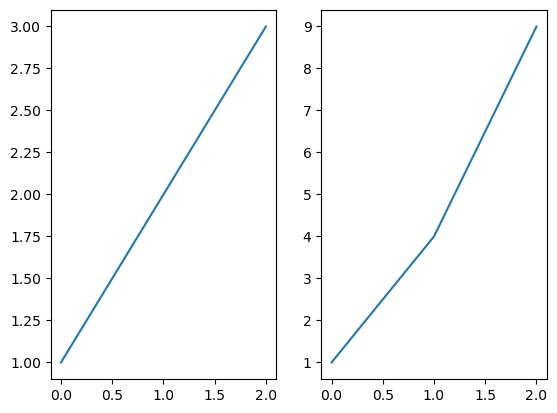

In [2]:
# Using ".add-subplot"
fig = plt.figure(2)

x = [0,1,2]

data = [1,2,3]
data2 = [1,4,9]

ax = fig.add_subplot(121)#specifying the plot has 1 row, 2 columns, and it is first(1) position
ax2 = fig.add_subplot(122)#specifying the plot has 1 row, 2 columns, and it is second(2) position

ax.plot(data)
ax2.plot(x, data2)

plt.show()

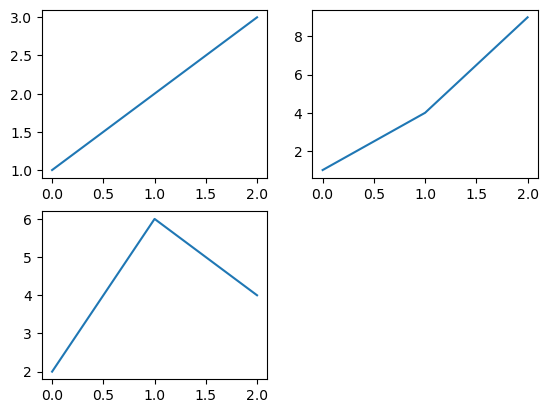

In [3]:
fig = plt.figure(3)

x = [0,1,2]

data = [1,2,3]
data2 = [1,4,9]
data3 = [2,6,4]

ax = fig.add_subplot(221) #specifying the plot has 2 rows, 2 columns, and it is first(1) position
ax2 = fig.add_subplot(222) #specifying the plot has 2 rows, 2 columns, and it is second(2) position
ax3 = fig.add_subplot(223) #specifying the plot has 2 rows, 2 columns, and it is third(3) position

ax.plot(data)
ax2.plot(x, data2)
ax3.plot(x, data3)

plt.show()

In [4]:
# loading in data from previous examples, to follow tutorial
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [21]:
# to straighten out the 'NaN' error forthescatter plots
housing_raw["total_homes_sold"] = housing_raw["total_homes_sold"].fillna(0)
housing_raw["inventory"] = housing_raw["inventory"].fillna(0)
housing_raw["months_of_supply"] = housing_raw["months_of_supply"].fillna(0)
housing_raw["age_of_inventory"] = housing_raw["age_of_inventory"].fillna(0)

In [22]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          622339 non-null  Int32         
 4   inventory                 622339 non-null  Int64         
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          622339 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          622339 non-null  float64       
dtypes: Int32(1), Int64(1), category(1), datetime64[ns](2), float64(4)
memory usage: 38.1 MB


In [10]:
ca_housing = (housing_raw
              .loc[(housing_raw["region_name"]
              .str.contains("CA"))]
              .assign(region_name = housing_raw["region_name"].str[0:-11])
              .set_index("period_begin").sort_index()
)

In [6]:
ca_housing_pivot= ca_housing.pivot_table(index="period_begin",
                                        columns = "region_name",
                                        values= "median_active_list_price").assign(
                                        CA_average= lambda x: x.mean(axis=1))

In [7]:
#narrowing down which regions we are lookng at
ca_housing_markets= ca_housing_pivot.loc[:, ["San Francisco",
                                            "Los Angeles",
                                            "San Diego",
                                            "Tulare"]]
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5


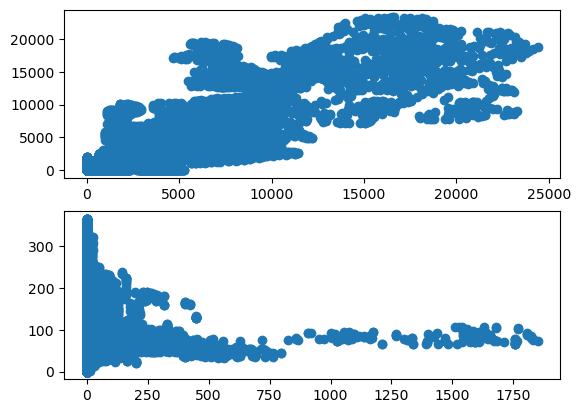

In [24]:
#One chart ontop of another
fig,ax= plt.subplots(2,1)

# When we have a single dimension, we can use single indexing
ax[0].scatter(housing_raw.loc[:, "total_homes_sold"], housing_raw.loc[:, "inventory"])
ax[1].scatter(housing_raw.loc[:, "months_of_supply"], housing_raw.loc[:, "age_of_inventory"])

### More Subplots

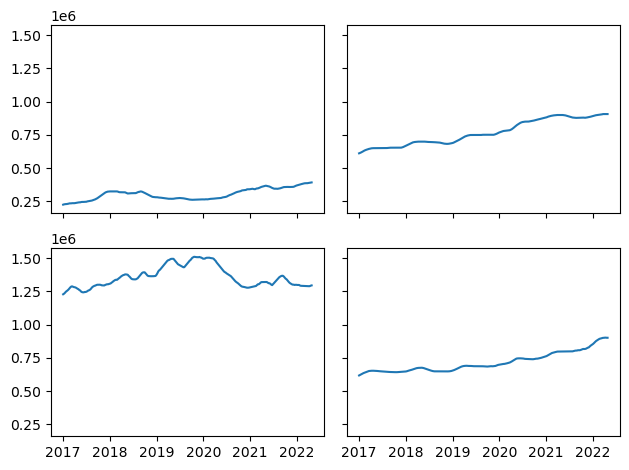

In [27]:
fig,ax= plt.subplots(2,2,
                    sharex='all',
                    sharey='all'
                    )

# When we have a multiple dimensions, we use double indexing
ax[0][0].plot(ca_housing_markets.index, ca_housing_markets["Tulare"])
ax[0][1].plot(ca_housing_markets.index, ca_housing_markets["Los Angeles"])
ax[1][0].plot(ca_housing_markets.index, ca_housing_markets["San Francisco"])
ax[1][1].plot(ca_housing_markets.index, ca_housing_markets["San Diego"])
      
plt.tight_layout()

C:\Users\kyobu\AppData\Local\Temp\ipykernel_22176\850510886.py:27: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
C:\Users\kyobu\AppData\Local\Temp\ipykernel_22176\850510886.py:28: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list);


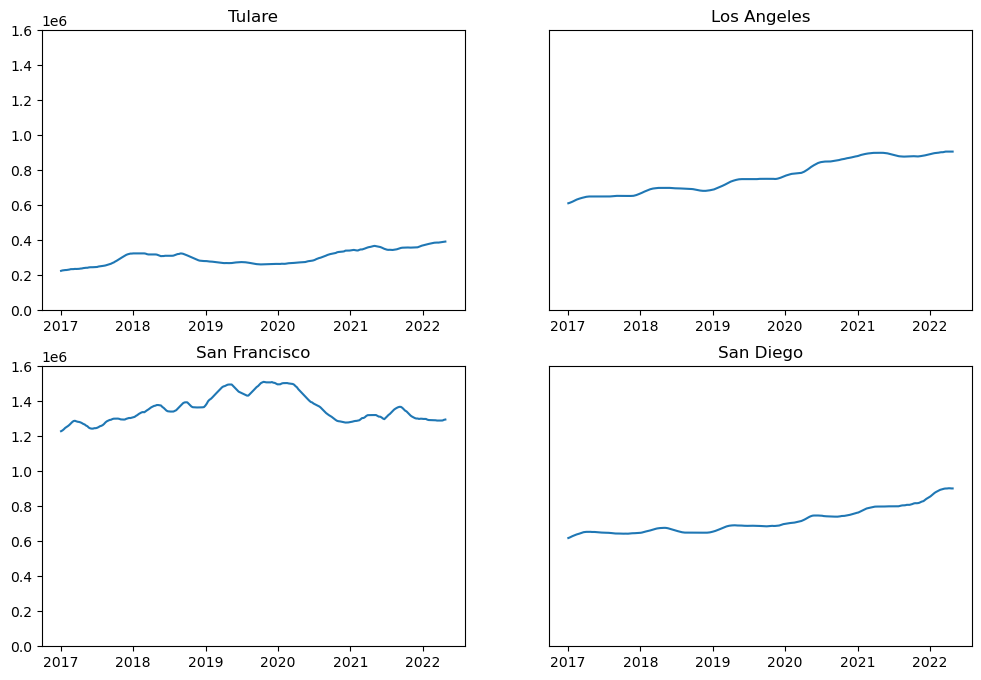

In [31]:
# looping
#Iterate and add
fig = plt.figure(figsize=(12,8))

# Crete list to interate for plotting
plot_list = ["Tulare", "Los Angeles", "San Francisco", "San Diego"]

# empty list to append to
ax_list = []

# Specifynumber of rows and columns
nrows, ncols = (2,2)

# loop through list of columns, adding subplots one at a time
for i in range(1, len(plot_list) +1):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.plot(ca_housing_markets[f"{plot_list[i-1]}"])
    ax.set_ylim(0,1600000)
    
    ax.set_title(f"{plot_list[i-1]}")
    ax_list.append(ax)
    
    if (i-1) % 2 != 0:
        ax.set_yticks([])

# helper method to share x and y axes        
ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list);